In [1]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, LSTM, Reshape, Concatenate
from tensorflow.keras.models import Model, Sequential

In [3]:
# Change the input for product images to (16, 16, 3)
image_input = Input(shape=(8, 8, 3), name='image_input')


In [4]:
# CNN layers for product image with Dropout
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = Dropout(0.5)(x)  # Add Dropout
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Dropout(0.5)(x)  # Add Dropout
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)  # Add Dropout

In [5]:
# Define the input for user interactions with 7 features
interaction_input = Input(shape=(4,), name='interaction_input')  # Use (7,) for 7 features

# Process user interactions through a Dense layer
y = Dense(64, activation='relu')(interaction_input)


In [6]:
# Concatenate the outputs of both branches
combined = Concatenate()([x, y])
combined_reshaped = Reshape((2, 64))(combined)

In [7]:
# LSTM for sequential data
lstm_out = LSTM(64)(combined_reshaped)

In [8]:
# Output layer (you can adjust the output size as per your requirement)
output = Dense(1, activation='linear')(lstm_out)

In [9]:
# Build the model
model = Model(inputs=[image_input, interaction_input], outputs=output)

In [10]:
# Create the model with two inputs and one output
model = Model(inputs=[image_input, interaction_input], outputs=output)

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [12]:
# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)      │ (None, 8, 8, 3)           │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 6, 6, 32)          │             896 │ image_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 6, 6, 32)          │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 4, 4, 64)          │          18,496 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 4, 4, 64)          │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 1024)              │               0 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 64)                │          65,600 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ interaction_input             │ (None, 4)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64)                │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 64)                │             320 │ interaction_input[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 128)               │               0 │ dropout_2[0][0],           │
│                               │                           │                 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 2, 64)             │               0 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 64)                │          33,024 │ reshape[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │              65 │ lstm[0][0]                 │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 118,401 (462.50 KB)

 Trainable params: 118,401 (462.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Save the trained model
model.save('model_new.keras')

### analysis

In [14]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('model_new.keras')

C:\Users\ASUS\tvenv\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 28 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the processed dataset (replace with the actual path to your file)
df = pd.read_csv('final_states_dataset.csv')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [17]:
# Prepare interaction data (selecting relevant features)
interaction_features = [
    'rating', 
    'no_of_rating',  
    'Latitude', 
    'Longitude'
]  # Features relevant for interactions


In [18]:
# Function to clean columns by removing non-numeric characters
def clean_column(column):
    # Remove non-numeric characters, keeping only numbers and decimal points
    return column.replace('[^0-9.]', '', regex=True).replace('', '0').astype(float)

# Ensure all selected columns are cleaned
for feature in interaction_features:
    df[feature] = clean_column(df[feature].fillna(0))  # Fill NaN with 0 before cleaning


In [19]:
# Prepare interaction data for the model
X_interactions = df[interaction_features].fillna(0).values  # Fill NaN with 0 or appropriate value
X_interactions = X_interactions.astype(float)  # Ensure all data is numeric


In [20]:
# Use 'no_of_rating' as the target variable
y = df['no_of_rating'].values.astype(float)



In [21]:
# Placeholder for image input (dummy image data)
dummy_image_input = np.zeros((X_interactions.shape[0], 8, 8, 3), dtype=np.float32)


In [22]:
# Split the data with test_size = 0.5
X_interactions_train, X_interactions_test, X_image_train, X_image_test, y_train, y_test = train_test_split(
    X_interactions, dummy_image_input, y, test_size=0.5, random_state=42
)

In [23]:
# Scaling interaction data
scaler = StandardScaler()
X_interactions_train = scaler.fit_transform(X_interactions_train)
X_interactions_test = scaler.transform(X_interactions_test)


In [24]:
# Scaling target variable (if it's a regression task)
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

In [25]:
# Define callbacks for model training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)


In [26]:
# Train the model (assuming 'model' is already defined and compiled)
history = model.fit(
    [X_image_train, X_interactions_train],  # Inputs: dummy images + interaction data
    y_train,
    epochs=20,
    batch_size=16,
    validation_data=([X_image_test, X_interactions_test], y_test),  # Validation data
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.8699 - mae: 0.1963 - val_loss: 0.0095 - val_mae: 0.0275 - learning_rate: 0.0010
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0303 - mae: 0.0346 - val_loss: 0.0070 - val_mae: 0.0256 - learning_rate: 0.0010
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0402 - mae: 0.0414 - val_loss: 0.0019 - val_mae: 0.0197 - learning_rate: 0.0010
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0166 - mae: 0.0244 - val_loss: 0.0030 - val_mae: 0.0202 - learning_rate: 0.0010
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0182 - mae: 0.0293 - val_loss: 0.0040 - val_mae: 0.0444 - learning_rate: 0.0010
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0123 - mae: 0.0284 - val_loss: 0.0021 - val_mae: 0.0258 - learning_rate: 0.0010


In [27]:
# Step 1: Evaluate on the Test Set
test_loss, test_mae = model.evaluate([X_image_test, X_interactions_test], y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - mae: 0.0189
Test Loss: 0.0019, Test MAE: 0.0197


In [28]:
# Step 2: Generate Predictions
predicted_scores = model.predict([X_image_test, X_interactions_test])

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [29]:
# Step 3: Compute Accuracy or other relevant metrics
# For a regression task, calculating R^2 or comparing MAE might be more meaningful.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predicted_scores)
mse = mean_squared_error(y_test, predicted_scores)
r2 = r2_score(y_test, predicted_scores)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Absolute Error: 0.0197
Mean Squared Error: 0.0019
R^2 Score: 0.9954


In [30]:
# If you want to compute accuracy based on a threshold:
threshold = 0.5  # Define a threshold if converting regression output to binary classification
predicted_labels = (predicted_scores >= threshold).astype(int)
actual_labels = (y_test >= threshold).astype(int)

In [31]:
#Confusion Matrix and Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(actual_labels, predicted_labels)
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

In [32]:
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9997
Confusion Matrix:
[[2883    1]
 [   0  127]]


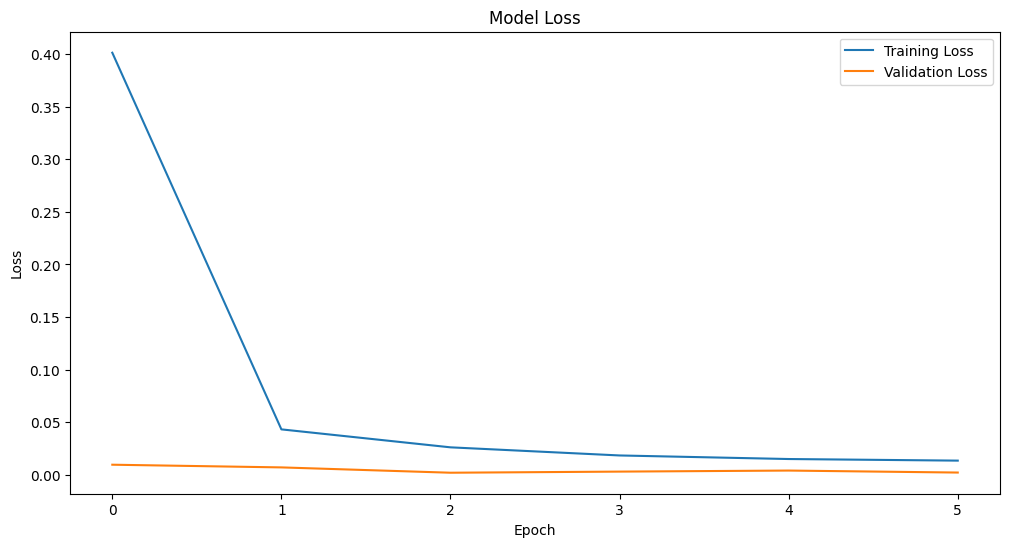

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


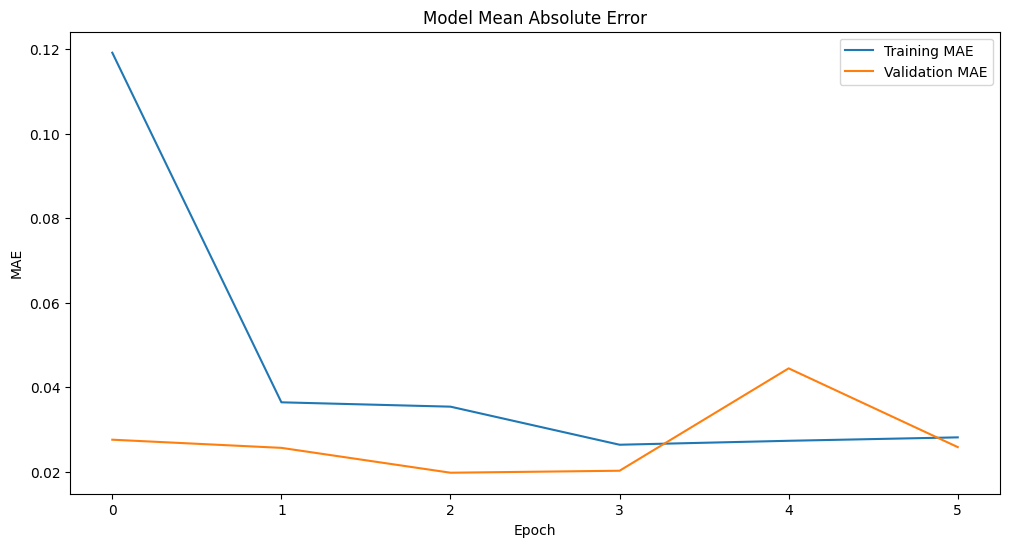

In [34]:
# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       0.99      1.00      1.00       127

    accuracy                           1.00      3011
   macro avg       1.00      1.00      1.00      3011
weighted avg       1.00      1.00      1.00      3011



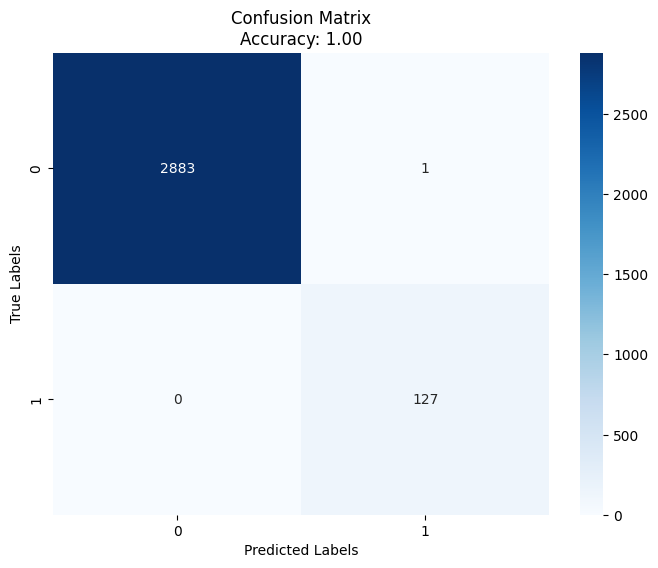

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you already have actual_labels and predicted_labels
accuracy = accuracy_score(actual_labels, predicted_labels)
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
# Optionally, print a classification report for more detailed metrics
print('\nClassification Report:')
print(classification_report(actual_labels, predicted_labels))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(actual_labels), 
            yticklabels=np.unique(actual_labels))
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### recommendation

In [37]:
pip install tabulate

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate  # Import tabulate for a cleaner display
from textwrap import fill  # Import textwrap to handle long text wrapping

# Load the dataset into a DataFrame
data = pd.read_csv("final_states_dataset.csv")  # Replace with your dataset path

# Features for the model (Latitude, Longitude, and category)
features = ['Latitude', 'Longitude', 'category']

# Preprocessing: Standardizing numerical values
scaler = StandardScaler()
X = scaler.fit_transform(data[['Latitude', 'Longitude']])  # Standardizing latitude and longitude

# Function to recommend products based on user location and category
def recommend_products(user_lat, user_lon, data, top_n=5):
    """
    Recommends products based on user location and other product features.
    
    Parameters:
    user_lat (float): Latitude of the user.
    user_lon (float): Longitude of the user.
    data (pd.DataFrame): Data containing product details.
    top_n (int): Number of top products to recommend.

    Returns:
    pd.DataFrame: Top N recommended products with relevant details.
    """
    # Calculate the distance between the user and the product locations
    data['distance_to_user'] = np.sqrt((data['Latitude'] - user_lat)**2 + (data['Longitude'] - user_lon)**2)
    
    # Score products by their proximity to the user (closer items get a higher score)
    data['score'] = -data['distance_to_user']

    # Sort products by score in ascending order (closer products first)
    recommended_products = data.sort_values(by='score', ascending=False).head(top_n)
    
    # Wrap long text for Full Address to improve readability
    recommended_products['Full Address'] = recommended_products['Full Address'].apply(lambda x: fill(str(x), width=50))

    # Return product details for the recommendations
    return recommended_products[['Full Address', 'rating', 'no_of_rating', 'category', 'distance_to_user']]

# Prompt user to input latitude and longitude
try:
    user_lat = float(input("Enter your latitude: "))
    user_lon = float(input("Enter your longitude: "))
except ValueError:
    print("Invalid input. Please enter numerical values for latitude and longitude.")
    exit()

# Get recommendations based on the user's input
recommendations = recommend_products(user_lat, user_lon, data)

# Print the recommendations in a tabular format with improved display
print(tabulate(recommendations, headers='keys', tablefmt='fancy_grid'))



Enter your latitude:  22.5011221
Enter your longitude:  88.33962


╒══════╤══════════════════════════════════════════════════╤══════════╤════════════════╤═══════════════╤════════════════════╕
│      │ Full Address                                     │   rating │   no_of_rating │ category      │   distance_to_user │
╞══════╪══════════════════════════════════════════════════╪══════════╪════════════════╪═══════════════╪════════════════════╡
│ 3226 │ Lake Mall Kolkata, West Bengal                   │      4.4 │          29000 │ Shopping mall │          0.0179215 │
├──────┼──────────────────────────────────────────────────┼──────────┼────────────────┼───────────────┼────────────────────┤
│ 3221 │ South City Mall Kolkata, West Bengal             │      4.6 │          83000 │ Shopping mall │          0.0218875 │
├──────┼──────────────────────────────────────────────────┼──────────┼────────────────┼───────────────┼────────────────────┤
│ 3261 │ Spencer's South City Mall Kolkata, West Bengal   │      4.5 │           9100 │ Hypermarket   │          0.0224753 │
